In [1]:
import os
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['axes.formatter.useoffset'] = False
from hsfs import StarkMatrix, h, c

In [2]:
nmin = 35
nmax = 37
S = 1
# specify the electric field
field = np.linspace(0, 30, 201) # V /cm
# calculate stark maps
stark_matrices = []
stark_maps = []
for i, MJ in enumerate([0, 1, 2]):
    # specify basis
    mat = StarkMatrix(nmin, nmax, S, MJ)
    stark_matrices.append(mat)
    print("MJ = %d. Number of basis states = %d."%(MJ, mat.num_states))
    sm = mat.stark_map(field * 100)
    # diagonalise for each field
    stark_maps.append(sm)

MJ = 0. Number of basis states = 318.


diagonalise Hamiltonian: 100%|███████████████████████████████████████████████████████| 201/201 [00:02<00:00, 97.04it/s]


MJ = 1. Number of basis states = 315.


diagonalise Hamiltonian: 100%|██████████████████████████████████████████████████████| 201/201 [00:01<00:00, 104.35it/s]


MJ = 2. Number of basis states = 306.


diagonalise Hamiltonian: 100%|██████████████████████████████████████████████████████| 201/201 [00:01<00:00, 103.65it/s]


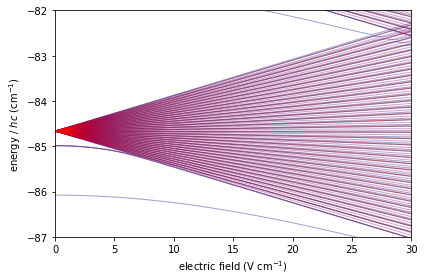

In [3]:
# Stark map
fig, ax = plt.subplots(figsize=(6, 4))

for mat, sm, col in zip(stark_matrices, stark_maps, ['k', 'b', 'r']):
    for ix in range(mat.num_states):
        ax.plot(field, 0.01*sm[:, ix] /(h * c), ls='-', lw=1, c=col, alpha=0.2)

# format
ax.set_ylim(-87, -82.)
ax.set_xlim(0, 30)
ax.set_xlabel('electric field (V cm$^{-1}$)')
ax.set_ylabel('energy / $h c$ (cm$^{-1}$)')
plt.tight_layout()
# output
plt.show()